In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split


In [ ]:
# import data
df = pd.read_csv('/content/drive/MyDrive/LatihanML/gemini_BTCUSD_2020_1min.csv')

In [ ]:
# cek data
df.head(50)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.618880e+12,4/20/2021 0:02,BTCUSD,55717.47,55723.00,55541.69,55541.69,2.406734
1,1.618880e+12,4/20/2021 0:01,BTCUSD,55768.94,55849.82,55711.74,55717.47,0.573458
2,1.618880e+12,4/20/2021 0:00,BTCUSD,55691.79,55793.15,55691.79,55768.94,3.309904
3,1.618880e+12,4/19/2021 23:59,BTCUSD,55777.86,55777.86,55677.92,55691.79,0.684934
4,1.618880e+12,4/19/2021 23:58,BTCUSD,55803.50,55823.88,55773.08,55777.86,0.477225
5,1.618880e+12,4/19/2021 23:57,BTCUSD,55690.64,55822.91,55682.56,55803.50,5.461717
6,1.618880e+12,4/19/2021 23:56,BTCUSD,55624.69,55713.02,55624.63,55690.64,0.696311
7,1.618880e+12,4/19/2021 23:55,BTCUSD,55651.82,55675.92,55621.58,55624.69,0.470161
8,1.618880e+12,4/19/2021 23:54,BTCUSD,55688.08,55730.21,55641.40,55651.82,0.456722
9,1.618880e+12,4/19/2021 23:53,BTCUSD,55749.28,55749.28,55688.08,55688.08,0.286419


In [ ]:
# cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658065 entries, 0 to 658064
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unix Timestamp  658065 non-null  float64
 1   Date            658065 non-null  object 
 2   Symbol          658065 non-null  object 
 3   Open            658065 non-null  float64
 4   High            658065 non-null  float64
 5   Low             658065 non-null  float64
 6   Close           658065 non-null  float64
 7   Volume          658065 non-null  float64
dtypes: float64(6), object(2)
memory usage: 40.2+ MB


In [ ]:
# cek deksriptif statistik
df.describe()

,Unix Timestamp,Open,High,Low,Close,Volume
count,6.580650e+05,658065.000000,658065.000000,658065.000000,658065.000000,658065.000000
mean,1.598615e+12,19816.056864,19828.754551,19803.078994,19816.127876,1.552492
std,1.188579e+10,16737.625576,16750.786597,16723.509939,16737.677688,6.235548
min,1.577840e+12,3935.290000,3939.260000,3901.250000,3935.290000,0.000000
25%,1.588310e+12,9177.940000,9180.000000,9176.310000,9177.940000,0.022162
50%,1.598790e+12,10936.110000,10939.210000,10932.980000,10936.150000,0.189712
75%,1.609000e+12,25741.490000,25755.150000,25724.100000,25743.160000,1.023481
max,1.618880e+12,64890.000000,64900.000000,64775.620000,64890.000000,1043.579964


In [ ]:
# cek data missing value
df.isnull().sum()

Unix Timestamp    0
Date              0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

In [ ]:
# hapus kolom yang tidak digunakan
df.drop(['Open','High','Low', 'Symbol', 'Unix Timestamp'], axis=1, inplace=True)
df.head(50)

,Date,Close,Volume
0,4/20/2021 0:02,55541.69,2.406734
1,4/20/2021 0:01,55717.47,0.573458
2,4/20/2021 0:00,55768.94,3.309904
3,4/19/2021 23:59,55691.79,0.684934
4,4/19/2021 23:58,55777.86,0.477225
5,4/19/2021 23:57,55803.50,5.461717
6,4/19/2021 23:56,55690.64,0.696311
7,4/19/2021 23:55,55624.69,0.470161
8,4/19/2021 23:54,55651.82,0.456722
9,4/19/2021 23:53,55688.08,0.286419


In [ ]:
# conversi tanggal
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M')
df

,Date,Close,Volume
0,2021-04-20 00:02:00,55541.69,2.406734
1,2021-04-20 00:01:00,55717.47,0.573458
2,2021-04-20 00:00:00,55768.94,3.309904
3,2021-04-19 23:59:00,55691.79,0.684934
4,2021-04-19 23:58:00,55777.86,0.477225
...,...,...,...
658060,2020-01-01 00:04:00,7163.00,1.751844
658061,2020-01-01 00:03:00,7163.60,0.002706
658062,2020-01-01 00:02:00,7163.00,0.063904
658063,2020-01-01 00:01:00,7163.30,0.002646


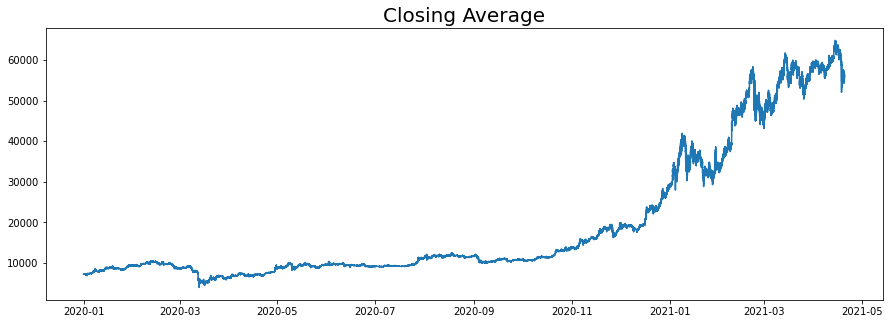

In [ ]:
# plot data cloasing average
dates = df['Date'].values
close  = df['Close'].values

plt.figure(figsize=(15,5))
plt.plot(dates, close)
plt.title('Closing Average',
          fontsize=20);

In [ ]:
# split dataset 20%
x_train, x_test, y_train, y_test = train_test_split(close, dates, test_size = 0.2, random_state=0, shuffle=False)


In [ ]:
# cek shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(526452,)
(131613,)
(526452,)
(131613,)


In [ ]:
# Fungsi ini untuk menerima sebuah series/atribut kita yang telah di konversi 
# menjadi tipe numpy, lalu mengembalikan label dan atribut dari dataset dalam 
# bentuk batch.
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
# x_train dan x_test di konversi dengan fungsi windowed dataset agar dapat digunakan dalam model
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=1000)
val_set = windowed_dataset(x_test, window_size=60, batch_size=100, shuffle_buffer=1000)

In [ ]:
# membuat model dengan 2 lstm
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [ ]:
# membuat optimizer dengan learning rate, loss function menggunakan hubber dan metric mae
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# menghitung mae sesuai kriteria yaitu 10%
min_mae = (max(close) - min(close)) * 0.1
min_mae

6095.4710000000005

In [ ]:
# membuat class callback untuk memberhentikan training ketika mae sudah mencapai kurang dari 10%
#  callback ini tidak digunakan karena ingin membuat plot yang lebih dari satu epoch
#  jika callback ini digunakan akan berhenti pada satu epoch dan untuk digunakan di plot tidak bagus
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<min_mae):
      print("\n Telah mencapai MAE <10%! \n")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# callback ReduceLROnPlateau 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)

# callback ModelCheckPoint dan early stopping 
check = 'ML-Dicoding-Check'
path = F"/content/drive/MyDrive/SubmissionDicodingPengembanganML/{check}"


checkpoint = tf.keras.callbacks.ModelCheckpoint(path, 
                                                monitor='val_loss', 
                                                verbose=2,
                                                save_best_only=False, 
                                                save_weights_only=False, 
                                                mode='auto', 
                                                save_freq='epoch', 
                                                options=None)


In [ ]:
# training data dengan epock 10
epochs = 10
history = model.fit(train_set,validation_data=val_set,
                    epochs=epochs, 
                    callbacks=[checkpoint,
                    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
                              ])

Epoch 1/10
5264/5264 [==============================] - 570s 108ms/step - loss: 492.2539 - mae: 492.7521 - val_loss: 1550.8822 - val_mae: 1551.3806

Epoch 00001: saving model to /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


Epoch 2/10
5264/5264 [==============================] - 569s 108ms/step - loss: 680.7283 - mae: 681.2246 - val_loss: 1500.0120 - val_mae: 1500.5122

Epoch 00002: saving model to /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


Epoch 3/10
5264/5264 [==============================] - 571s 108ms/step - loss: 683.7164 - mae: 684.2147 - val_loss: 1532.8608 - val_mae: 1533.3600

Epoch 00003: saving model to /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


Epoch 4/10
5264/5264 [==============================] - 578s 110ms/step - loss: 681.7635 - mae: 682.2621 - val_loss: 1514.3590 - val_mae: 1514.8580

Epoch 00004: saving model to /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


Epoch 5/10
5264/5264 [==============================] - 572s 109ms/step - loss: 696.8376 - mae: 697.3369 - val_loss: 1550.4482 - val_mae: 1550.9478

Epoch 00005: saving model to /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


Epoch 6/10
5264/5264 [==============================] - 574s 109ms/step - loss: 692.3821 - mae: 692.8829 - val_loss: 1524.5952 - val_mae: 1525.0973

Epoch 00006: saving model to /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


Epoch 7/10
5264/5264 [==============================] - 576s 109ms/step - loss: 704.8218 - mae: 705.3223 - val_loss: 1507.2869 - val_mae: 1507.7882

Epoch 00007: saving model to /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


Epoch 8/10
5264/5264 [==============================] - 571s 108ms/step - loss: 681.1450 - mae: 681.6469 - val_loss: 1473.4197 - val_mae: 1473.9192

Epoch 00008: saving model to /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


Epoch 9/10
5264/5264 [==============================] - 572s 109ms/step - loss: 649.4118 - mae: 649.9102 - val_loss: 1512.7537 - val_mae: 1513.2528

Epoch 00009: saving model to /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


Epoch 10/10
5264/5264 [==============================] - 577s 110ms/step - loss: 689.5376 - mae: 690.0361 - val_loss: 1512.3768 - val_mae: 1512.8777

Epoch 00010: saving model to /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SubmissionDicodingPengembanganML/ML-Dicoding-Check/assets


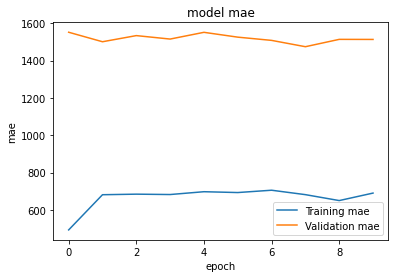

In [ ]:
#Plot mae
# karena epoch nya hanya satu jadi plot tidak terlihat 
plt.plot(history.history['mae'], label='Training mae')
plt.plot(history.history['val_mae'], label='Validation mae')
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

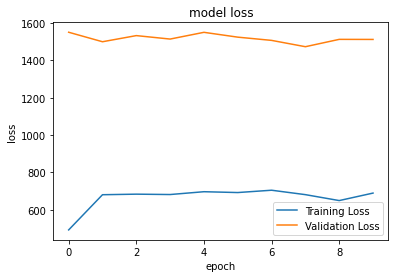

In [ ]:
#Plot loss
# karena epoch nya hanya satu jadi plot tidak terlihat 
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()